In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

## 类MATLAB API

最简单的入门是从类 MATLAB API 开始，它被设计成兼容 MATLAB 绘图函数。

Text(0.5,1,'title')

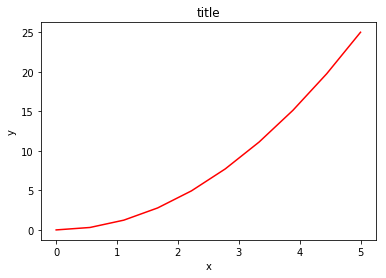

In [15]:
x = linspace(0, 5, 10)
y = x ** 2

figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')

### 创建子图，选择绘图用的颜色与描点符号:

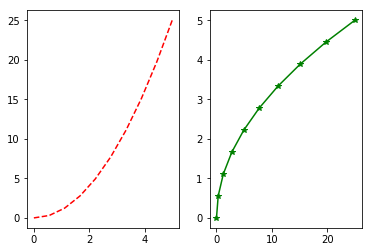

In [16]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

linspace表示在0到5之间用10个点表示，plot的第三个参数表示画线的颜色与样式

此类 API 的好处是可以节省你的代码量，但是我们并不鼓励使用它处理复杂的图表。处理复杂图表时， matplotlib 面向对象 API 是一个更好的选择。

## matplotlib 面向对象 API

使用面向对象API的方法和之前例子里的看起来很类似，不同的是，我们并不创建一个全局实例，而是将新建实例的引用保存在 fig 变量中,如果我们想在图中新建一个坐标轴实例，只需要 调用 fig 实例的 add_axes 方法：

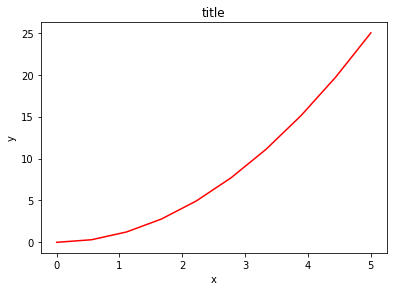

In [17]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show()



尽管会写更多的代码，好处在于我们对于图表的绘制有了完全的控制权，可以很容易地多加一个坐标轴到图中：

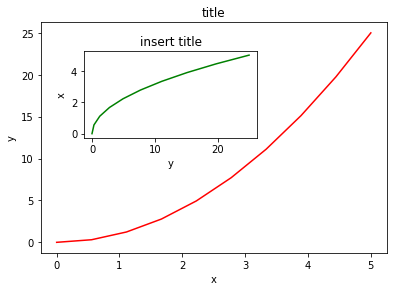

In [18]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

plt.show()

如果我们不在意坐标轴在图中的排放位置️，那么就可以使用matplotlib的布局管理器了，我最喜欢的是subplots，使用方式如下：

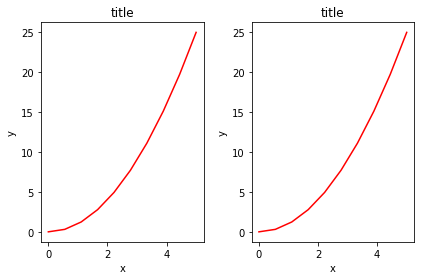

In [19]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig.tight_layout()

plt.show()

### 图表尺寸，长宽比 与 DPI

在创建 Figure 对象的时候，使用figsize 与 dpi 参数能够设置图表尺寸与DPI， 创建一个800*400像素，每英寸100像素的图就可以这么做：

In [20]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

同样的参数也可以用在布局管理器上:

Text(0.5,1,'title')

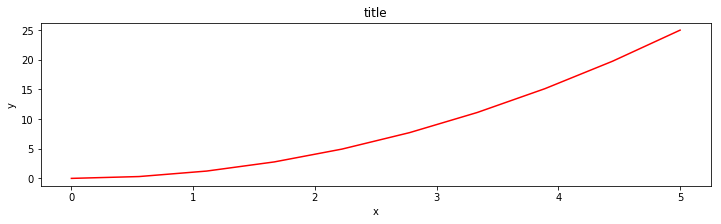

In [21]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

### 保存图表

可以使用 savefig 保存图表

fig.savefig("filename.png")
这里我们也可以有选择地指定DPI，并且选择不同的输出格式：

fig.savefig("filename.png", dpi=200)

有哪些格式？哪种格式能获得最佳质量？

Matplotlib 可以生成多种格式的高质量图像，包括PNG，JPG，EPS，SVG，PGF 和 PDF。如果是科学论文的话，我建议尽量使用pdf格式。 (pdflatex 编译的 LaTeX 文档使用 includegraphics 命令就能包含 PDF 文件)。 一些情况下，PGF也是一个很好的选择。

### 图例，轴标 与 标题

<font size="2">现在我们已经介绍了如何创建图表画布以及如何添加新的坐标轴实例，让我们看一看如何加上标题，轴标和图例</font><br />

<font size="4">标题</font><br />
<font size="2">
每一个坐标轴实例都可以加上一个标题，只需调用坐标轴实例的 set_title 方法:

ax.set_title("title");

<font size="4">轴标</font><br />

类似的， set_xlabel 与 set_ylabel 可以设置坐标轴的x轴与y轴的标签。

ax.set_xlabel("x")
ax.set_ylabel("y");

<font size="4">图例</font><br />

有两种方法在图中加入图例。一种是调用坐标轴对象的 legend 方法，传入与之前定义的几条曲线相对应地图例文字的 列表/元组：

ax.legend([“curve1”, “curve2”, “curve3”]);

不过这种方式容易出错，比如增加了新的曲线或者移除了某条曲线。更好的方式是在调用 plot方法时使用 label=”label text” 参数，再调用 legend 方法加入图例：

<font size="2">ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

legend 还有一个可选参数 loc 决定画出图例的位置，详情见：http://matplotlib.org/users/legend_guide.html#legend-location

最常用的值如下：

In [23]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
   #many more options are available

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


下面这个例子同时包含了标题，轴标，与图例的用法：

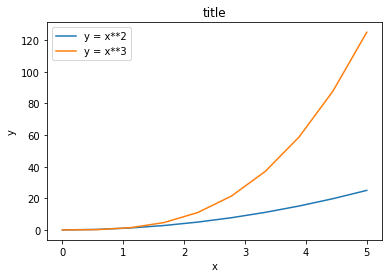

In [24]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

plt.show()

### 格式化文本，LaTeX，字体大小，字体类型

Matplotlib 对 LaTeX 提供了很好的支持。我们只需要将 LaTeX 表达式封装在 符号内，就可以在图的任何文本中显示了，比如“符号内，就可以在图的任何文本中显示了，比如“

不过这里我们会遇到一些小问题，在 LaTeX 中我们常常会用到反斜杠，比如 \alpha 来产生符号 αα

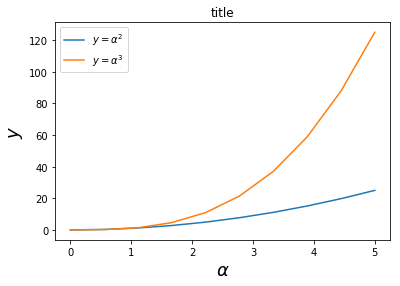

In [25]:
import matplotlib.pyplot as plt
from pylab import *
x = linspace(0, 5, 10)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

plt.show()

我们可以更改全局字体大小或者类型:

from matplotlib import rcParams
rcParams.update({'font.size': 18, 'font.family': 'serif'})

STIX 字体是一种好选择：

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

我们也可以将图中的文本全用 Latex 渲染：

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})



### 设置颜色，线宽 与 线型

颜色

有了matplotlib，我们就有很多方法能够定义线的颜色和很多其他图形元素。首先，我们可以使用类MATLAB语法，’b’ 代表蓝色，’g’ 代表绿色，依此类推。matplotlib同时也支持 MATLAB API 选择线型所使用的方式：比如 ‘b.-‘ 意味着蓝线标着点：

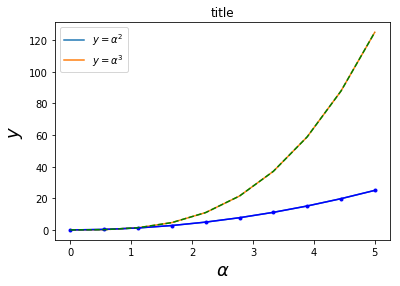

In [26]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

fig

我们也可以以颜色的名字或者RGB值选择颜色，alpha参数决定了颜色的透明度：

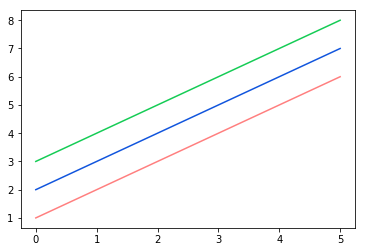

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

### 控制坐标轴的样式

坐标轴样式也是通常需要自定义的地方，像是标号或是标签的位置或是字体的大小等。

图的范围

我们想做的第一件事也许是设置坐标轴的范围，可以使用 set_ylim 或是 set_xlim 方法或者 axis(‘tight’) 自动将坐标轴调整的紧凑 The first thing we might want to configure is the ranges of the axes. We can do this using the set_ylim and set_xlim methods in the axis object, or axis(‘tight’) for automatrically getting “tightly fitted” axes ranges:

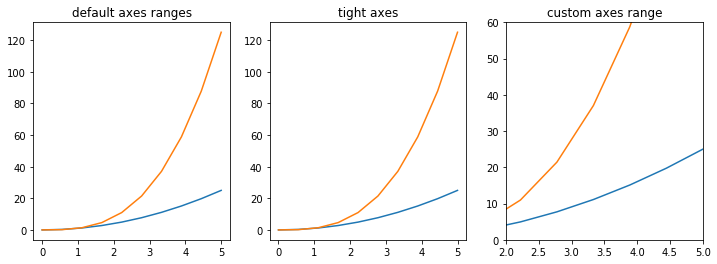

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

### 对数刻度

也可以将轴的刻度设置成对数刻度，调用 set_xscale 与 set_yscale 设置刻度，参数选择 “log” ：

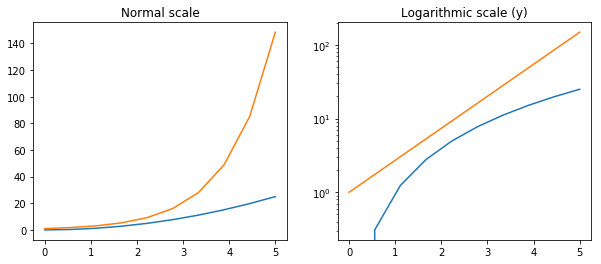

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(x, x**2, x, exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### 自定义标号位置与符号

set_xticks 与 set_yticks 方法可以显示地设置标号的位置， set_xticklabels 与 set_yticklabels 为每一个标号设置符号：

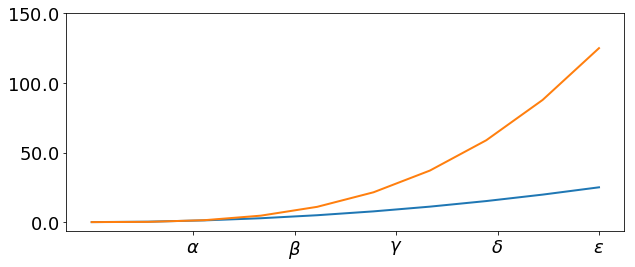

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

### 科学计数法

如果轴上涉及非常大的数，最好使用科学计数法：

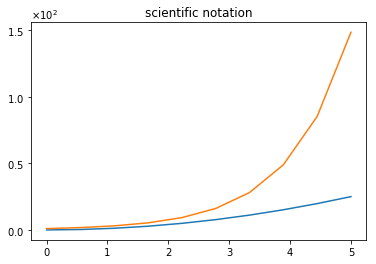

In [32]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### 轴上数与标签的间距

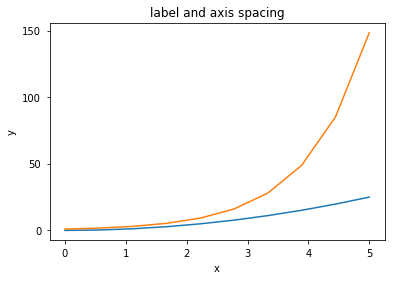

In [33]:
# distance between x and y axis and the numbers on the axes
rcParams['xtick.major.pad'] = 5
rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");


### 调整坐标轴的位置：

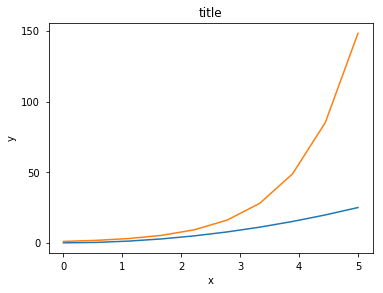

In [34]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### 坐标轴网格

grid 方法可以打开关闭网格线，也可以自定义网格的样式：

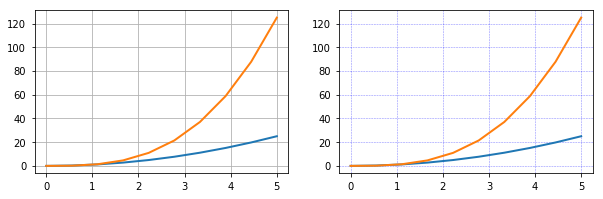

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### 轴

我们也可以改变轴的属性:

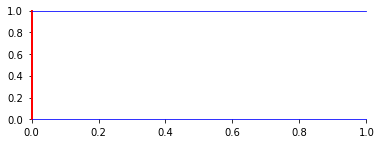

In [37]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### 双坐标轴

twinx 与 twiny 函数能设置双坐标轴：

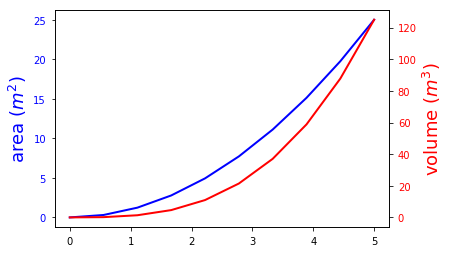

In [38]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### 设置坐标原点在（0，0）点

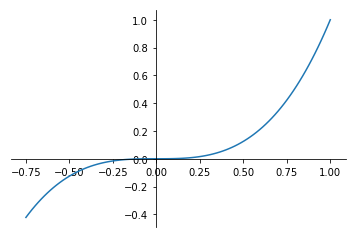

In [39]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## 其他 2D 图表风格

包括一般的 plot 方法, 还有很多其他函数能够生成不同类型的图表，详情请见 http://matplotlib.org/gallery.html 这里列出其中几种比较常见的函数方法。

### 一些常用图表

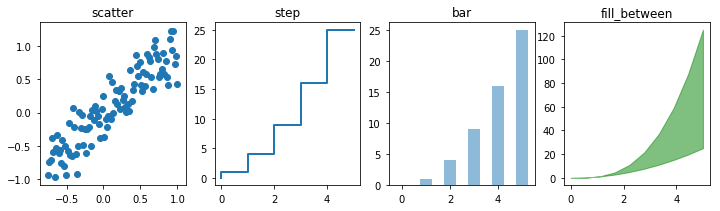

In [40]:
n = array([0,1,2,3,4,5])


fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

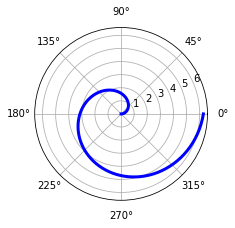

In [41]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 2 * pi, 100)
ax.plot(t, t, color='blue', lw=3);

### hist的参数含义

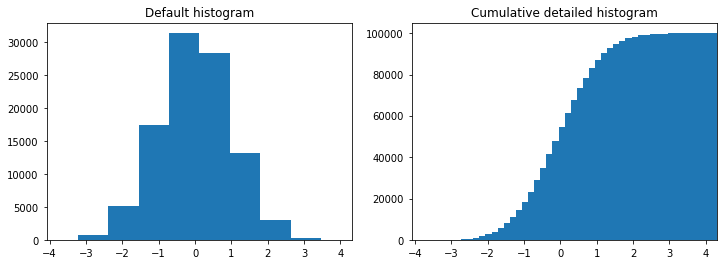

In [42]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

hist的参数含义

x : (n,) array or sequence of (n,) arrays

这个参数是指定每个bin(箱子)分布的数据,对应x轴

bins : integer or array_like, optional

这个参数指定bin(箱子)的个数,也就是总共有几条条状图

normed : boolean, optional

If True, the first element of the return tuple will be the counts normalized to form a probability density, i.e.,n/(len(x)`dbin)

这个参数指定密度,也就是每个条状图的占比例比,默认为1

color : color or array_like of colors or None, optional

这个指定条状图的颜色

### 饼状图

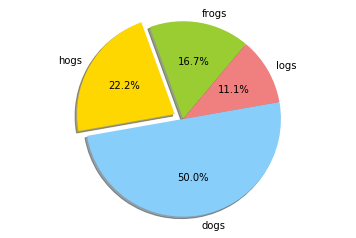

In [43]:
import matplotlib.pyplot as plt

labels='frogs','hogs','dogs','logs'
sizes=15,20,45,10
colors='yellowgreen','gold','lightskyblue','lightcoral'
explode=0,0.1,0,0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.show()

### 文本注释

text 函数可以做文本注释，且支持 LaTeX 格式：

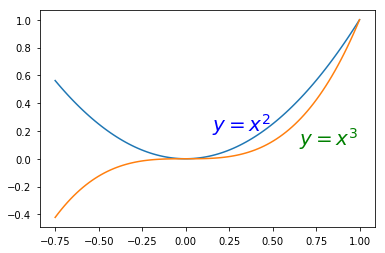

In [44]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### 带有多子图与插图的图

fig.add_axes 在图中加入新坐标轴

subplots， subplot2grid，gridspec等 子图布局管理器

#### subplots

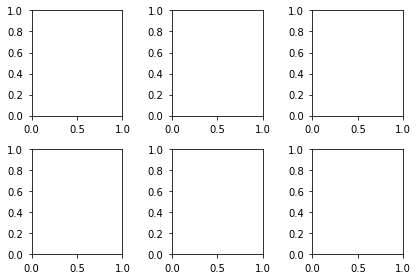

In [45]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

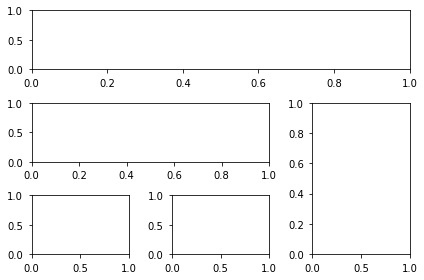

In [46]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

## 显示中文问题

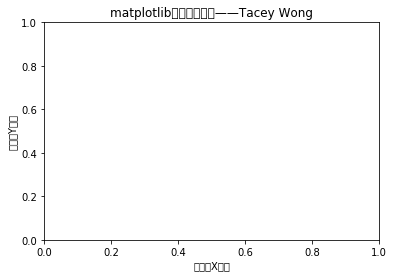

In [2]:
from pylab import *
import random

plt.title(u'matplotlib中文显示测试——Tacey Wong')
plt.xlabel(u'这里是X坐标')
plt.ylabel(u'这里是Y坐标')

plt.show()

如上图所示，matplotlib无法显示中文，中文变为框框。

使用如下代码将中文输出变成可能

其中要填写系统字体文件的地址

D:\software\Anaconda\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


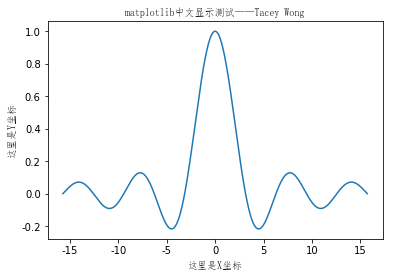

In [7]:
from pylab import *
import random

myfont = matplotlib.font_manager.FontProperties(fname="C:\Windows\Fonts\simfang.ttf")
mpl.rcParams['axes.unicode_minus'] = False
t = arange(-5*pi, 5*pi, 0.001)
y = sin(t)/t
my_post = plt.plot(t, y)
plt.title(u'matplotlib中文显示测试',fontproperties=myfont)
plt.xlabel(u'这里是X坐标',fontproperties=myfont)
plt.ylabel(u'这里是Y坐标',fontproperties=myfont)

plt.show()